In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [5]:
df = pd.read_csv("Electric_Vehicle_Population_Size_History_By_County_.csv")

In [6]:
df.head(10)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
5,May 31 2018,Maui,HI,Passenger,1,0,1,59,60,1.67
6,November 30 2017,Northampton,PA,Passenger,0,1,1,66,67,1.49
7,March 31 2018,Nassau,NY,Passenger,1,0,1,37,38,2.63
8,March 31 2020,DeKalb,IN,Passenger,1,0,1,1,2,50.00
9,January 31 2019,Columbia,WA,Truck,0,0,0,"1,529","1,529",0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [49]:

# Convertir les colonnes spécifiées en float
columns_to_convert = ["Battery Electric Vehicles (BEVs)", 
                      "Plug-In Hybrid Electric Vehicles (PHEVs)", 
                      "Electric Vehicle (EV) Total", 
                      "Non-Electric Vehicle Total", 
                      "Total Vehicles"]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Assurez-vous que les colonnes ont été converties avec succès
print(df.dtypes)

Date                                        datetime64[ns]
County                                              object
State                                               object
Vehicle Primary Use                                 object
Battery Electric Vehicles (BEVs)                   float64
Plug-In Hybrid Electric Vehicles (PHEVs)           float64
Electric Vehicle (EV) Total                        float64
Non-Electric Vehicle Total                         float64
Total Vehicles                                     float64
Percent Electric Vehicles                          float64
dtype: object


In [50]:
df.describe()

,Date,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
count,20819,20266.000000,20468.000000,20119.000000,13983.000000,13979.000000,20819.000000
mean,2020-11-13 19:57:00.855949056,25.855176,21.790942,31.623093,132.845312,134.463767,4.139216
min,2017-01-31 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2019-03-31 00:00:00,0.000000,0.000000,1.000000,26.000000,27.000000,0.390000
50%,2020-12-31 00:00:00,1.000000,1.000000,1.000000,69.000000,70.000000,1.220000
75%,2022-07-31 00:00:00,2.000000,1.000000,3.000000,167.000000,169.000000,2.995000
max,2024-02-29 00:00:00,999.000000,999.000000,999.000000,999.000000,998.000000,100.000000
std,NaN,102.004224,92.309729,115.742017,174.033916,174.448753,11.055350


In [51]:
df.isna().sum()

Date                                           0
County                                        86
State                                         86
Vehicle Primary Use                            0
Battery Electric Vehicles (BEVs)             553
Plug-In Hybrid Electric Vehicles (PHEVs)     351
Electric Vehicle (EV) Total                  700
Non-Electric Vehicle Total                  6836
Total Vehicles                              6840
Percent Electric Vehicles                      0
dtype: int64

In [52]:
df["Vehicle Primary Use"].unique()

array(['Passenger', 'Truck'], dtype=object)

In [30]:
# convertir la date en format date
df["Date"] = pd.to_datetime (df["Date"]) 


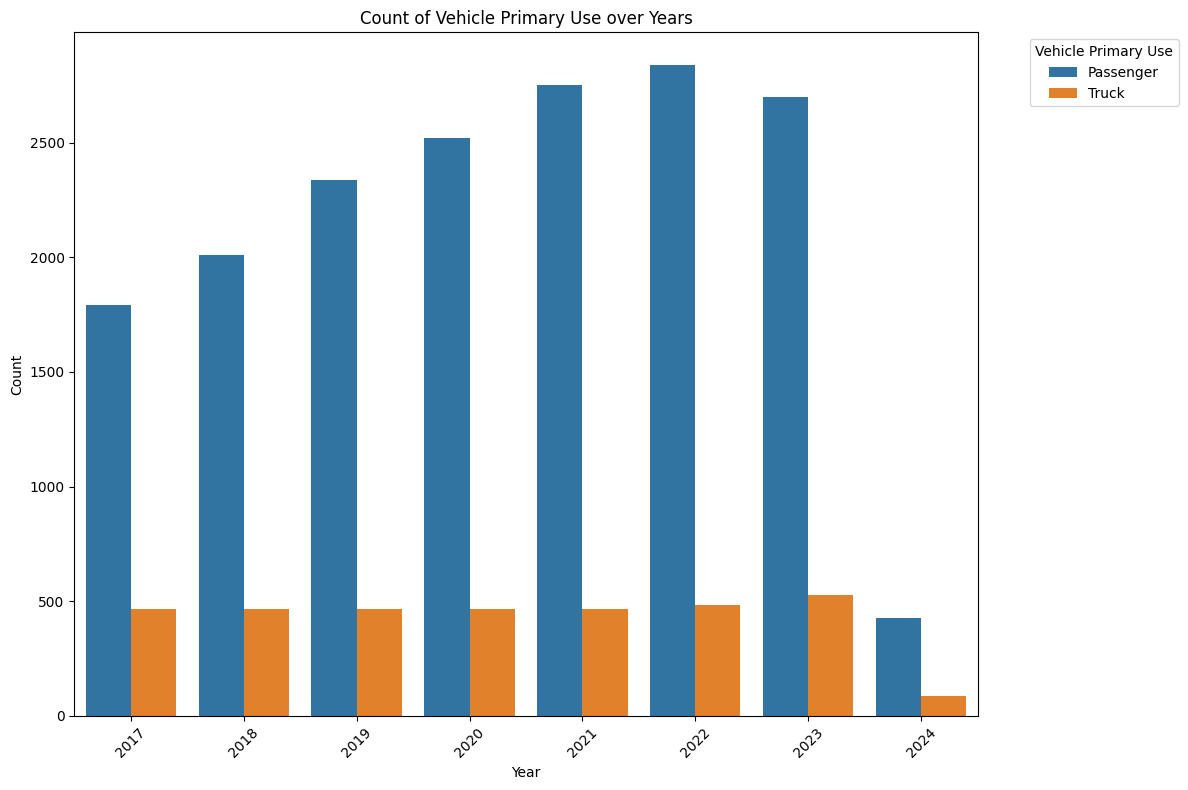

In [62]:

# Supposons que df soit votre DataFrame

# Convertir la colonne "Date" en format de date si ce n'est pas déjà fait
df["Date"] = pd.to_datetime(df["Date"])

# Extraire l'année de la colonne "Date"
df["Year"] = df["Date"].dt.year

# Compter le nombre d'occurrences de chaque catégorie de "Vehicle Primary Use" pour chaque année
usage_count = df.groupby(['Year', 'Vehicle Primary Use']).size().reset_index(name='Count')

# Tracer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Year", y="Count", hue="Vehicle Primary Use", data=usage_count)
plt.title('Count of Vehicle Primary Use over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Primary Use', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
